# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(1)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
281553,0.0024,0.0024,0.0049,0.0024,0.0024,0.0024,0.0098,0.0391,0.0024,0.0488,0,0,0,0


In [3]:
raw_data.shape

(471483, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

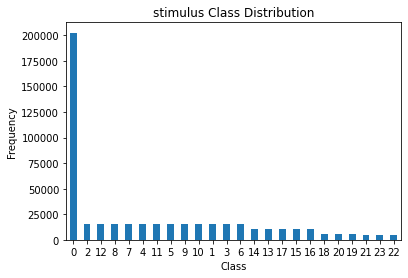

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
144428,0.8911,0.4370,0.1489,0.0513,0.0317,0.1367,0.6079,0.3687,0.1099,0.2148,2,2,6,6
280050,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0195,0.0024,0.0439,0,0,0,0
242894,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.0195,0.1074,0.0024,0.0513,0,0,0,0
386448,0.0513,0.0024,0.0024,0.0024,0.0024,0.0024,0.0635,0.2393,0.2515,1.3013,0,0,0,0
127916,0.0854,0.0024,0.0024,0.0024,0.0049,0.0024,0.0024,0.1025,0.0024,0.0146,0,0,0,0


In [12]:
raw_data.shape

(378535, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378535 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          378535 non-null  float64
 1   Emg2          378535 non-null  float64
 2   Emg3          378535 non-null  float64
 3   Emg4          378535 non-null  float64
 4   Emg5          378535 non-null  float64
 5   Emg6          378535 non-null  float64
 6   Emg7          378535 non-null  float64
 7   Emg8          378535 non-null  float64
 8   Emg9          378535 non-null  float64
 9   Emg10         378535 non-null  float64
 10  repetition    378535 non-null  int64  
 11  rerepetition  378535 non-null  int64  
 12  stimulus      378535 non-null  int64  
 13  restimulus    378535 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 43.3 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Scalling Data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(X)

# t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [18]:
from sklearn.manifold import TSNE

In [22]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
X_tsne = tsne.fit_transform(X)

E:\MachineLearning\envs\gpu\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\MachineLearning\envs\gpu\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 378535 samples in 1.806s...
[t-SNE] Computed neighbors for 378535 samples in 202.288s...
[t-SNE] Computed conditional probabilities for sample 1000 / 378535
[t-SNE] Computed conditional probabilities for sample 2000 / 378535
[t-SNE] Computed conditional probabilities for sample 3000 / 378535
[t-SNE] Computed conditional probabilities for sample 4000 / 378535
[t-SNE] Computed conditional probabilities for sample 5000 / 378535
[t-SNE] Computed conditional probabilities for sample 6000 / 378535
[t-SNE] Computed conditional probabilities for sample 7000 / 378535
[t-SNE] Computed conditional probabilities for sample 8000 / 378535
[t-SNE] Computed conditional probabilities for sample 9000 / 378535
[t-SNE] Computed conditional probabilities for sample 10000 / 378535
[t-SNE] Computed conditional probabilities for sample 11000 / 378535
[t-SNE] Computed conditional probabilities for sample 12000 / 378535
[t-SNE] Computed conditional prob

[t-SNE] Computed conditional probabilities for sample 119000 / 378535
[t-SNE] Computed conditional probabilities for sample 120000 / 378535
[t-SNE] Computed conditional probabilities for sample 121000 / 378535
[t-SNE] Computed conditional probabilities for sample 122000 / 378535
[t-SNE] Computed conditional probabilities for sample 123000 / 378535
[t-SNE] Computed conditional probabilities for sample 124000 / 378535
[t-SNE] Computed conditional probabilities for sample 125000 / 378535
[t-SNE] Computed conditional probabilities for sample 126000 / 378535
[t-SNE] Computed conditional probabilities for sample 127000 / 378535
[t-SNE] Computed conditional probabilities for sample 128000 / 378535
[t-SNE] Computed conditional probabilities for sample 129000 / 378535
[t-SNE] Computed conditional probabilities for sample 130000 / 378535
[t-SNE] Computed conditional probabilities for sample 131000 / 378535
[t-SNE] Computed conditional probabilities for sample 132000 / 378535
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 240000 / 378535
[t-SNE] Computed conditional probabilities for sample 241000 / 378535
[t-SNE] Computed conditional probabilities for sample 242000 / 378535
[t-SNE] Computed conditional probabilities for sample 243000 / 378535
[t-SNE] Computed conditional probabilities for sample 244000 / 378535
[t-SNE] Computed conditional probabilities for sample 245000 / 378535
[t-SNE] Computed conditional probabilities for sample 246000 / 378535
[t-SNE] Computed conditional probabilities for sample 247000 / 378535
[t-SNE] Computed conditional probabilities for sample 248000 / 378535
[t-SNE] Computed conditional probabilities for sample 249000 / 378535
[t-SNE] Computed conditional probabilities for sample 250000 / 378535
[t-SNE] Computed conditional probabilities for sample 251000 / 378535
[t-SNE] Computed conditional probabilities for sample 252000 / 378535
[t-SNE] Computed conditional probabilities for sample 253000 / 378535
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 365000 / 378535
[t-SNE] Computed conditional probabilities for sample 366000 / 378535
[t-SNE] Computed conditional probabilities for sample 367000 / 378535
[t-SNE] Computed conditional probabilities for sample 368000 / 378535
[t-SNE] Computed conditional probabilities for sample 369000 / 378535
[t-SNE] Computed conditional probabilities for sample 370000 / 378535
[t-SNE] Computed conditional probabilities for sample 371000 / 378535
[t-SNE] Computed conditional probabilities for sample 372000 / 378535
[t-SNE] Computed conditional probabilities for sample 373000 / 378535
[t-SNE] Computed conditional probabilities for sample 374000 / 378535
[t-SNE] Computed conditional probabilities for sample 375000 / 378535
[t-SNE] Computed conditional probabilities for sample 376000 / 378535
[t-SNE] Computed conditional probabilities for sample 377000 / 378535
[t-SNE] Computed conditional probabilities for sample 378000 / 378535
[t-SNE] Computed con

In [23]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size = 0.2, random_state = 39)

# KNeighborsClassifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
y_pred = KNeighborsClassifier.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred)* 100}")

Accuracy is: 68.31864953042651


# Decision Tree

In [27]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_pred1 = tree.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy1 = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 60.248061605928115


# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
y_pred2 = RandomForestClassifier.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy2 = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 69.17061830478028


# XGBoost

In [33]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='multi:softmax')
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:52:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [34]:
y_pred3 = xgb.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy3 = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 62.79075911078236


# Support Vector Machine

In [ ]:
from sklearn import svm
svm = svm.SVC(kernel='rbf')
svm.fit(X_train, y_train)

In [ ]:
y_pred4 = svm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy4 = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")